# Finnish Parliamentary Elections Predator Prey Model

## Introduction

A Democratic nation is one that is built by and for the citizens of a country. The elected leaders of democratic countries are often regarded as the chosen ‘representative’ of the people. Consequently, a political scenario may find many parties offering their candidacy for leading the country. In most of the elections, voters are permitted to elect for a single representative only and each such vote casted allowed for the claim of a seat by associated political party. In effect, it wasn’t uncommon to witness political clashes and aggressive tactics within such systems.

In the context of a democratic country like Finland, which allowed for proportionate representation, several parties existed, both large and small, ‘dominant’ and less ‘dominant’. As a consequence, political structure, agenda, goodwill and other social factors affected the votes received by parties during election times (Durand and Durand, 1992). Considering the competition involved in procuring such votes, the political electoral scenario in Finland can be imagined representing a form of predator prey relationship and thus be modelled using the Lotka Volterra Equation.


## "SKDL" & "Others" parties
One of Finland’s foremost political parties is the communist led electoral alliance (“SKDL”) (Durand and Durand, 1992). Having shown success in many consecutive years, this party is modelled as the ‘predator’ for other parties within the Finnish parliamentary elections.  All the other parties (“Others”) collectively form the ‘prey’ for “SKDL” (Durand and Durand, 1992).

The ‘predator prey’ relationship within the Finnish political system can be described mathematically using a Loketta-Volterra model 

<br>

\begin{equation}
\begin{array}{cl}
\frac{d P}{dt}=a_{Birth} P-b_{Con}PS,\\
\frac{d S}{dt}=-c_{Death}S+d_{Food} SP,\\
\end{array}
\end{equation}
<br>

This set of equations models the interaction between "Other" parties' current number of votes (P) and "SKDL" party's number of votes (S). The  parameters used are
* $a_{Birth}$ is the birth rate of the "SKDL" parties';
* $b_{Con}$ is the consumation rate of "SKDL" parties' votes by "Other" party's (interaction);
* $c_{Death}$ is the death rate of "Other" party's votes if there is no "SKDL" votes;
* $d_{Food}$ is the rate that "Other" party 'eats' the votes of "SKDL" parties' to survive (interaction).

## Party Votes Differential Equation

The initial vote counts were taken to be those from the year 1954. Thus, the final Lotka Volterra Equation can be modelled as an initial value problem shown below :

<br>

\begin{equation}
\frac{d P}{dt}= 0.6 * P(t)- 0.0013*P(t)*S(t)
\end{equation}



&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;for $0\leq t \leq 10$ years, 


where,

$P$ denotes  "Other\"   parties' current number of votes, with initial number of votes as $$p(0)=1575$$ 

<br>
<br>


\begin{equation}
\frac{d S}{dt}= -0.39*S(t) + 0.00022*S(t)*P(t)
\end{equation}



&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;for $0\leq t \leq 10$ years, 

where,

$S$ refers to SKDL's number of votes, with their initial number of votes as $$s(0)=433$$


Another parameter of interest would be the equilibrium or critical points of the system of differential equations. These are the number of votes accumulated by either parties after which there will not be any change to their values over time. In other words, their rates of changes of will be zero,

\begin{equation}
\frac{d P}{dt}= 0
\end{equation}                                                                             
\begin{equation}
\frac{d S}{dt}= 0
\end{equation}

The Lotka Volterra equations thus reduces to

\begin{equation}
0.6*P(t)-0.0013*P(t)*S(t)=0  
\end{equation}

\begin{equation}
-0.39*S(t)+0.00022*S(t)*P(t)=0                   
\end{equation}



Which gives two sets of equilibrium or critical points as,

$$P(t) = 0$$  
$$S(t) = 0$$  
<br>
$$P (t) = 1772.75$$  
$$S(t) = 461.5$$      


## Component Plot

In [70]:
#IMPORTING REQUIRED PACKAGES

from numpy import *
import pylab as p

# DEFINITION OF PARAMETERS

a = 0.6
b = 0.0013
c = 0.39
d = 0.00022

# INITIAL CONDITIONS

X_0 = array([1575,433])

In [71]:
# DISCRETIZATION OF TIME( 10,000 time steps)

N=10000
t_start=1950.0
t_end=1980.0

t = linspace(t_start, t_end,  N)
Others=zeros(N)
SDKL=zeros(N)

h=(t_end-t_start)/N
Others[0]=X_0[0]
SDKL[0]=X_0[1]

In [72]:
# NUMERICAL SOLUTION OF DIFFERENTIAL EQUATIONS

for i in range (1,N):
    Others[i]= Others[i-1] + h*(a*Others[i-1] - b*Others[i-1]*SDKL[i-1])
    SDKL[i]= SDKL[i-1] + h*(-c*SDKL[i-1] + d*SDKL[i-1]*Others[i-1])
    

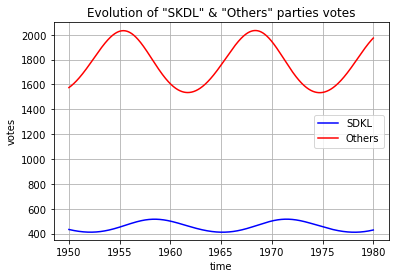

In [73]:
# PLOTTING NUMERICAL SOLUTION USING MATPLOTLIB

f1 = p.figure()
p.plot(t, SDKL, 'b-', label='SDKL')
p.plot(t, Others, 'r-', label='Others')
p.grid()
p.legend(loc='best')
p.ylim(350, 2100)
p.xlabel('time')
p.ylabel('votes')
p.title('Evolution of "SKDL" & "Others" parties votes')
f1.savefig('Evolution of "SKDL" & "Others" parties votes.png')
p.show()

## Inference from Component plot

A periodic pattern, reflecting the cyclic nature of votes accumulation is observed for the both the “SKDL” and “Others” party groups. 

The “SKDL” group’s votes approaches its first crest (peak) point at about 510,000 votes in the year 1962 and reaches the first trough (lowest) point of 400,000 votes in the year 1956. The approximate period for this vote cycle is observed to be close to 12.5 years while the amplitude of the periodic fluctuations is 55,000 votes.

On the other hand, the “Others” group approaches its crest value of around 2100,000 votes by the year 1958, while reaching the trough point of 1550,000 votes in the year 1966. The period in this case was 14 years, while an amplitude of 275,000 votes was recorded.


## Phase Plane Plot

In [74]:
# DEFINING GROWTH RATE OF VOTE COUNT FOR EITHER PARTIES

def dX_dt(X, t=0 ):
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*X[0]*X[1] ])
                  

In [75]:
# EQUILIBRIUM OR CRITICAL POINTS

X_f0 = array([ 0. , 0.])
X_f1 = array([ c/d, a/b])


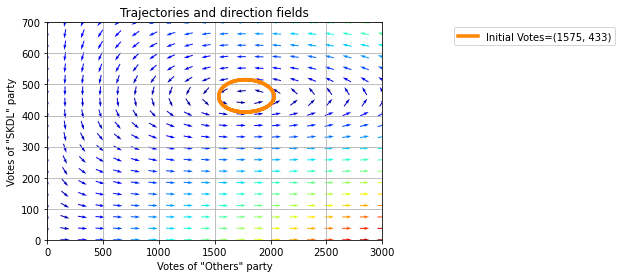

In [77]:
# IMPORT INTEGRATION PACKAGE

from scipy import integrate  

#-------------------------------------------------------
# INTEGRATING THE DIFFERENTIAL EQUATION
                                       
X, infodict = integrate.odeint(dX_dt, X_0, t, full_output=True)
infodict['message']                    

#-------------------------------------------------------
# CREATING TRAJECTORIES & SELECTING COLORS

values  = linspace(0.3, 0.9, 5)                          
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  

f2 = p.figure()
v=1

#-------------------------------------------------------
# PLOTTING TRAJECTORIES

X = integrate.odeint(dX_dt, X_0, t)         
p.plot( X[:,0], X[:,1], lw=3.5*v, color=vcolors[v,:], label='Initial Votes=(%.f, %.f)' % ( X_0[0], X_0[1]) )

#-------------------------------------------------------
# DEFINING A GRID AND COMPUTING DIRECTION AT EACH POINT

ymax = p.ylim(bottom =0,top = 700)[1]           # get axis limits
xmax = p.xlim(left =0, right = 3000)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate
M[ M == 0] = 1.                                 # Avoid zero division errors
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# DRAWING DIRECTION FIELDS, USING NORMALIZED ARROWS 

p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Votes of "Others" party')
p.ylabel('Votes of "SKDL" party')
p.legend(bbox_to_anchor=(1.2, 1.0))
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('SKDL & Other.png')

## Inference from Component plot

The phase plane plotted shows how the system of differential equations converges to the equilibrium points. Depending on the initial values for the differential equation, we can track a trajectory for the initial value, observing how it converges to the critical point. Note that the normalized arrows changes direction depending on the relative sign of the rates of changes of “SKDL” & “Others” vote counts. For e.g. if  dS/dt < 0 & dP/dt > 0, there will be a gradual decline in the votes for “SKDL” and an increase in that for “Others”. The arrows will consequently shift their direction to reflect this change.

For this predator prey model, we have assumed an initial vote count as discussed before and since this is different from the critical point derived, we note the initial path line as a yellow trajectory line. This line gradually moves in the direction governed by the normalized arrows and eventually help converge to the equilibrium state.

Overall, the results obtained tallied well with the experimental results published in Durand and Durand’s (1992) work.
